In [15]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

mpl.rcParams['pdf.fonttype'] = 42
%config InlineBackend.figure_format = 'retina'

In [ ]:
cmap = {
    'Control': '#000000',
    'Vehicle2': '#f08080',
    'Vehicle10': '#a9a9a9',
    'ABT-263': '#a9a9a9',
    'Venetoclax': '#a9a9a9',
    'Protac Bcl2': '#f08080',
    'Protac Bcl-xL': '#f08080'
    }

In [16]:
df = pd.read_excel('../data/BW.xlsx')

In [17]:
df = df.melt(id_vars=df.columns[:-2], value_vars=df.columns[-2:], var_name='Treatment')
df.Treatment = df.Treatment.str.title()

In [18]:
df.Drug = df.Drug.astype('category').cat.reorder_categories(['Control','Vehicle10', 'ABT-263', 'Venetoclax','Vehicle2', 'Protac Bcl2', 'Protac Bcl-xL'])

In [22]:
test = df.groupby('Drug',observed=False).apply(lambda x: stats.ttest_ind(x.loc[x.Treatment == 'Before', 'value'],
                                                                         x.loc[x.Treatment == 'After', 'value']).pvalue
                                               ).pipe(multipletests, method='bonferroni')[1]
test

/var/folders/pg/_gfvzhnj3zxc0lm8r3cm3jc00000gn/T/ipykernel_40930/2861701300.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test = df.groupby('Drug',observed=False).apply(lambda x: stats.ttest_ind(x.loc[x.Treatment == 'Before', 'value'],


array([1., 1., 1., 1., 1., 1., 1.])

In [25]:
# define a function to calculate the min and max of the SEM
def cal_sem(x:np.array):
    return np.mean(x) - stats.sem(x, nan_policy='omit'), np.mean(x) + stats.sem(x, nan_policy='omit')

In [27]:
df = df[df.Drug != 'Protac Bcl2'].copy()
df.Drug = df.Drug.cat.remove_unused_categories()

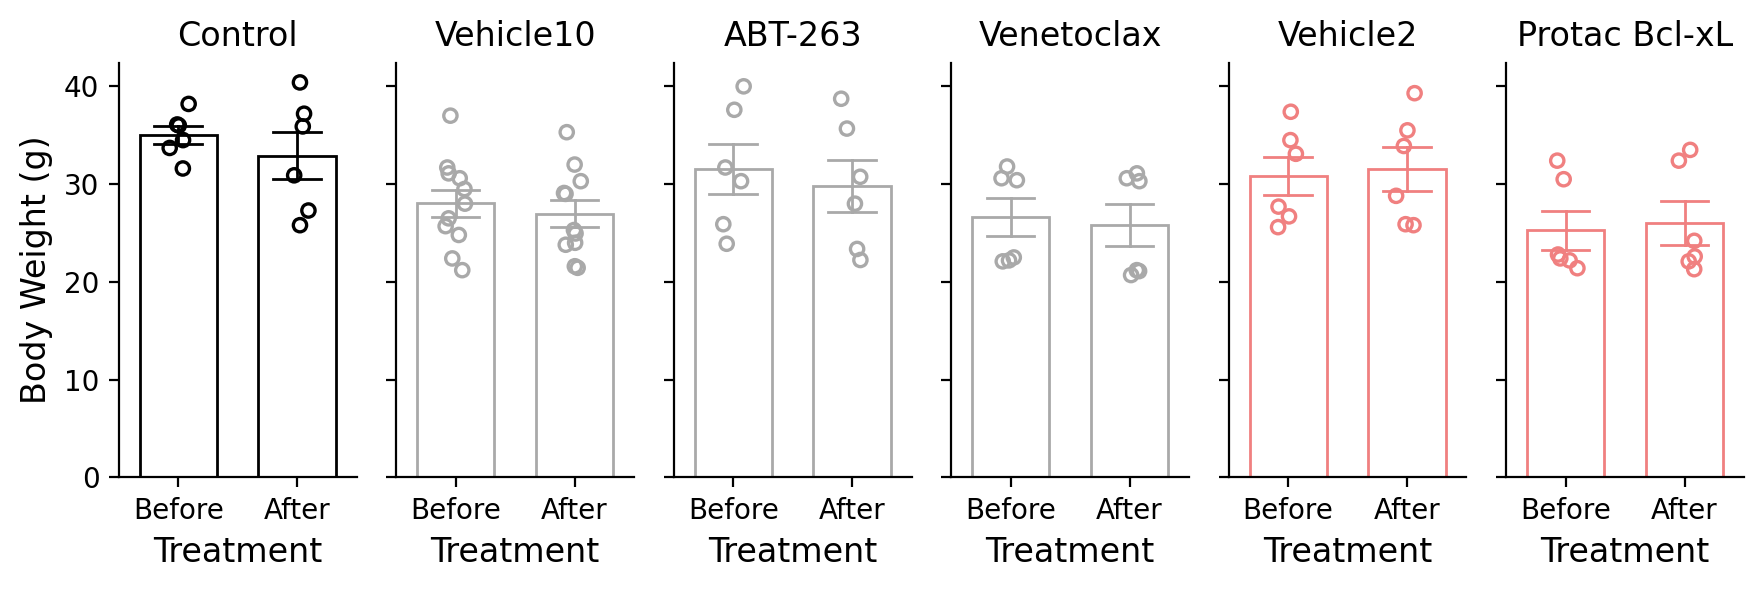

In [29]:
g = sns.catplot(
    df, kind="bar",
    x="Treatment", y="value", col="Drug",
    palette=cmap, hue="Drug",
    height=3, aspect=.5, width=0.65,
    fill=False, linewidth=1,
    errorbar=cal_sem, capsize=.4,
    err_kws={"linewidth": 1})
g.map_dataframe(sns.stripplot, x="Treatment", y="value", color="black", size=6, marker="$\circ$", 
                hue='Drug',palette=cmap, zorder=1)
g.set_titles(col_template="{col_name}", size=12)
g.set_ylabels('Body Weight (g)', size=12)
g.set_xlabels('Treatment', size=12)
g.legend.remove()
g.fig.savefig('/Users/pax/Library/CloudStorage/OneDrive-KarolinskaInstitutet/BHDrug_plots/BW.pdf', dpi=300, bbox_inches='tight')